In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sympy as sp
import pyPI as pi

In [29]:
# Laser
E = 2189.40 * np.array([[1], [1]]) # V/m -> 10mW y 1mm diametro

# Beamsplitter
BS = 1/np.sqrt(2) * np.array([[1, 1], 
                                [1, -1]])

E_in = BS @ E
E_in = pi.field_notation(E_in, p = True)

3096.279173459654
0.0
0.0π


In [30]:
# Campo incidente en la muestra
# E = HWP*QWP*E_in
Eis = pi.jones_matrix(np.pi/2, np.pi/8) @ (pi.jones_matrix(np.pi, np.pi) @ E_in)
Eis = pi.field_notation(Eis, p = True)

2681.4564214247443
1548.1395867298274
0.30408672398469655π


In [31]:
# Campo a la salida en la muestra
# E = HWP*QWP*E_in
Es = pi.jones_matrix(np.pi/2, np.pi/32) @ Eis
Es = pi.field_notation(Es, p = True)


2626.0856403241432
1640.3106198776297
0.14401522713856396π


In [32]:
# Brazo de referencia E ~ H
# E = HWP*QWP*E_in
Er_1 = pi.jones_matrix(np.pi/2, 0) @ (pi.jones_matrix(np.pi, 0) @ E_in)
Er_1 = pi.field_notation(Er_1, p = True)

3096.279173459654
0.0
0.0π


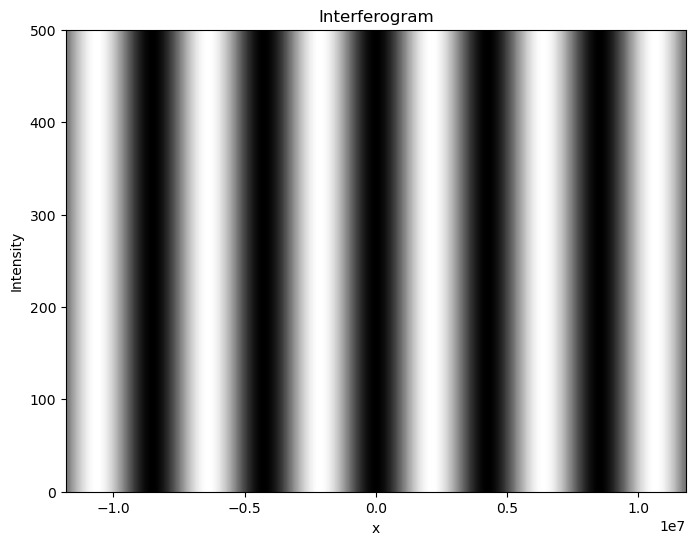

In [33]:
# Primer interferograma
info_1, i_1 = pi.I(Er_1, Es, plot=True)

In [34]:
# Brazo de referencia E ~ +45
Er_2 = pi.jones_matrix(np.pi/2, np.pi/4) @ (pi.jones_matrix(np.pi, np.pi/8) @ E_in)
Er_2 = pi.field_notation(Er_2, p = True)

2189.4
2189.4
6.611426760895711e-17π


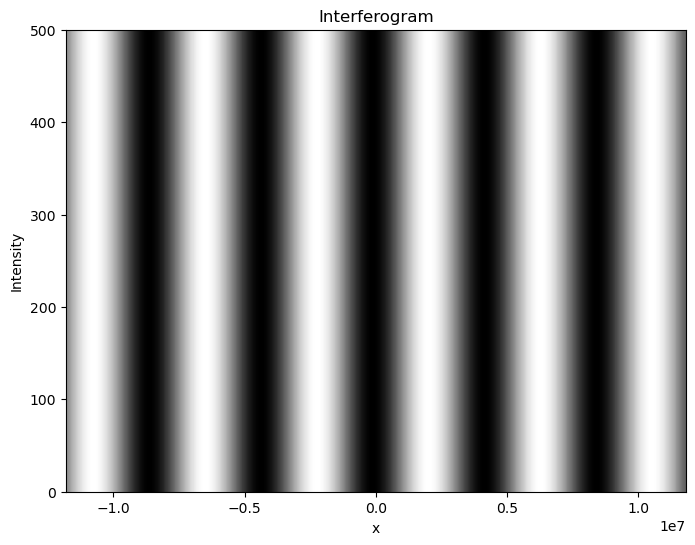

In [35]:
# Segundo interferograma
info_2, i_2 = pi.I(Er_2, Es, plot=True)

In [36]:
# Recosntruccion de campo a la salida de la muestra
pi.Es_parameters(Er_1, Er_2, info_1, info_2, p = True)

print("Original Parameters:")
print(np.abs(Es[0,0]))
print(np.abs(Es[1,0]))
print(f"{np.angle(Es[1,0])/np.pi}π")

Calculated Parameters:
Esx: 2626.0856403241432
Esy: 1640.310619877629
Delta_phi_s: 0.14401522713856438π
Original Parameters:
2626.0856403241432
1640.3106198776297
0.14401522713856396π
